# Dataset Statistics

In [4]:
# libraries


import nltk, torch
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")





KeyboardInterrupt: 

In [ ]:
# common functions

In [9]:
import json
import numpy as np

def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

# def write_json(data, path):
#     with open(path, 'w', encoding="utf-8") as f:
#         json.dump(data, f, indent=4, ensure_ascii=False)




def total_count_dataset(data):
    token_count_stat = []
    for i, line in enumerate(data):
        tokens = line['tokens'] if 'tokens' in line.keys() else line['token']
        
        count = len(tokens)
        line['token_count'] = count
        token_count_stat.append(line)
        
    return token_count_stat
        
        
def compute_stats(data):
    counts_token = []
    total_sentence = len(data)
    for item in data:
        counts_token.append( item['token_count'])
    mean = np.mean(counts_token)
    min = np.min(counts_token)
    max = np.max(counts_token)
    stats = {'min':min, 'max':max, 'mean':mean, 'size':total_sentence}
    return stats


In [10]:
def visualize_stats_with_barchart():
    pass

## FewRel

In [11]:
# all_data
all_data_path = "/Users/sefika/phd_projects/CRE_PTM/data/fewrel/all_fewrel_data.json"


In [12]:
fewrel_data = read_json(all_data_path)
data_info = total_count_dataset(fewrel_data)

In [13]:
fewrel_stats = compute_stats(data_info)

## TACRED

In [14]:
task_path = '/Users/sefika/phd_projects/CRE_PTM copy/data/tacred/related_work_results/resluts/tacred_tasks.json'
task_relation = read_json(task_path)

In [15]:
task_relation_types =task_relation['run_1']
relation_types = []
for task_name  in task_relation_types:
    print(task_relation_types[task_name])
    relation_types.extend(task_relation_types[task_name])

['per:cities_of_residence', 'per:other_family', 'org:founded', 'per:origin']
['per:cause_of_death', 'org:dissolved', 'per:employee_of', 'org:member_of']
['per:parents', 'per:alternate_names', 'org:top_members/employees', 'per:siblings']
['per:stateorprovinces_of_residence', 'org:alternate_names', 'org:country_of_headquarters', 'per:country_of_birth']
['per:children', 'per:date_of_birth', 'org:founded_by', 'per:countries_of_residence']
['per:schools_attended', 'org:subsidiaries', 'org:members', 'org:political/religious_affiliation']
['org:stateorprovince_of_headquarters', 'per:charges', 'per:stateorprovince_of_birth', 'per:title']
['per:stateorprovince_of_death', 'org:number_of_employees/members', 'per:city_of_death', 'per:spouse']
['org:website', 'per:age', 'per:city_of_birth', 'per:date_of_death']
['org:shareholders', 'org:parents', 'org:city_of_headquarters', 'per:religion']


In [16]:
def select_in_task(task_relations, data):
    selected_data = []
    for item in data:
        if item['relation'] in task_relations:
            item['tokens'] = item['token']
            selected_data.append(item)
    return selected_data

In [17]:
# train_path
train_path = '/Users/sefika/phd_projects/CRE_PTM copy/data/tacred/data/final/train.json'
# val_path
val_path = '/Users/sefika/phd_projects/CRE_PTM copy/data/tacred/data/final/dev.json'
# test_path
test_path = '/Users/sefika/phd_projects/CRE_PTM copy/data/tacred/data/final/test.json'

In [18]:
# remove unused relation types.
train_data = select_in_task(relation_types, read_json(train_path))
val_data = select_in_task(relation_types, read_json(val_path))
test_data = select_in_task(relation_types, read_json(test_path))


In [19]:
all_data = []
all_data.extend(train_data)
all_data.extend(val_data)
all_data.extend(test_data)

In [20]:
all_data_info = total_count_dataset(all_data)
stats_tacred = compute_stats(all_data_info)

### Visualize

In [21]:
stats_tacred['data']='TACRED'

In [22]:
fewrel_stats['data']='FewRel'

In [23]:
stats = []
stats.append(stats_tacred)
stats.append(fewrel_stats)

In [24]:
fewrel_stats

{'min': 4, 'max': 36, 'mean': 24.952375, 'size': 56000, 'data': 'FewRel'}

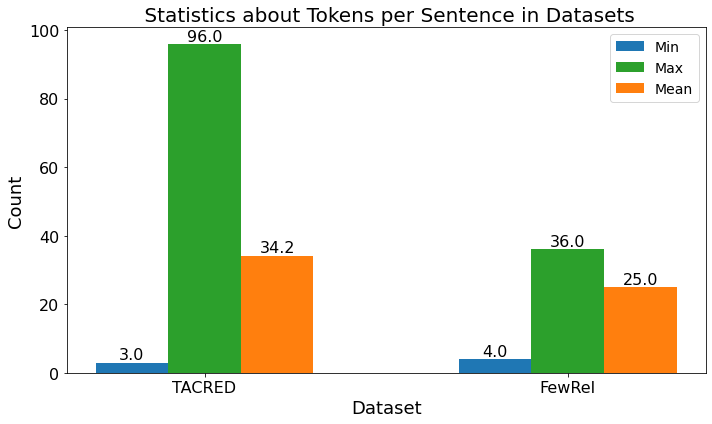

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'stats' is the data you're working with
data = stats  # Replace this with your actual data

# Extract values from the data
labels = [item['data'] for item in data]
min_values = [item['min'] for item in data]
max_values = [item['max'] for item in data]
mean_values = [item['mean'] for item in data]

# Set up positions for the bars on the x-axis
x = np.arange(len(data))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Define colors for the bars
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Blue, Green, Orange

# Plot each group of bars
min_bars = ax.bar(x - bar_width, min_values, bar_width, label='Min', color=colors[0])
max_bars = ax.bar(x, max_values, bar_width, label='Max', color=colors[1])
mean_bars = ax.bar(x + bar_width, mean_values, bar_width, label='Mean', color=colors[2])

# Labels and title with customized font size
ax.set_xlabel('Dataset', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title(' Statistics about Tokens per Sentence in Datasets', fontsize=20)

# Customize x-ticks to show the dataset names and increase font size
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)

# Customize y-ticks font size
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

# Annotate counts at the top of the bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', 
                ha='center', va='bottom', fontsize=16, color='black')

# Add annotations for each bar group (min, max, and mean)
annotate_bars(min_bars)
annotate_bars(max_bars)
annotate_bars(mean_bars)

# Customize the legend with larger font
ax.legend(fontsize=14)

# Save the figure as a PDF with high dpi
plt.tight_layout()
plt.savefig('data_stats.pdf', dpi=500)

# Display the chart
plt.show()
